In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from Question2 import Stitching
from PIL import Image

st = Stitching()

H,matchImg = st.main("right1.jpg","left1.jpg")

Image loaded...
Image loaded...
Found keypoints in right1.jpg : 4196
Found keypoints in left1.jpg : 5318

 Point pairs with distance less than threshold:
[(50, 572), (522, 608)]
[(88, 572), (557, 608)]
[(230, 328), (676, 366)]
[(242, 612), (706, 647)]
[(249, 608), (712, 643)]
[(254, 611), (718, 646)]
[(340, 614), (805, 649)]
[(365, 529), (823, 562)]
[(369, 603), (834, 639)]
[(370, 407), (821, 437)]
[(372, 598), (836, 633)]
[(383, 569), (845, 603)]
[(389, 614), (855, 650)]
[(409, 555), (871, 588)]
[(409, 613), (876, 649)]
[(422, 599), (889, 634)]
[(424, 325), (870, 349)]
[(433, 323), (880, 347)]
[(464, 616), (936, 652)]
[(478, 315), (928, 335)]
[(478, 315), (928, 335)]
[(497, 320), (949, 340)]
[(504, 608), (980, 644)]
[(509, 371), (965, 392)]
[(520, 556), (993, 588)]

 Average residual of inliers for the best fit  0.38136371668046576 
Final homography: [[ 7.58215123e-01  3.21719359e-02  4.48921275e+02]
 [-1.35218108e-01  9.03906388e-01  7.75100672e+01]
 [-2.11410558e-04 -4.03693206e-05 

Image loaded...
Image loaded...


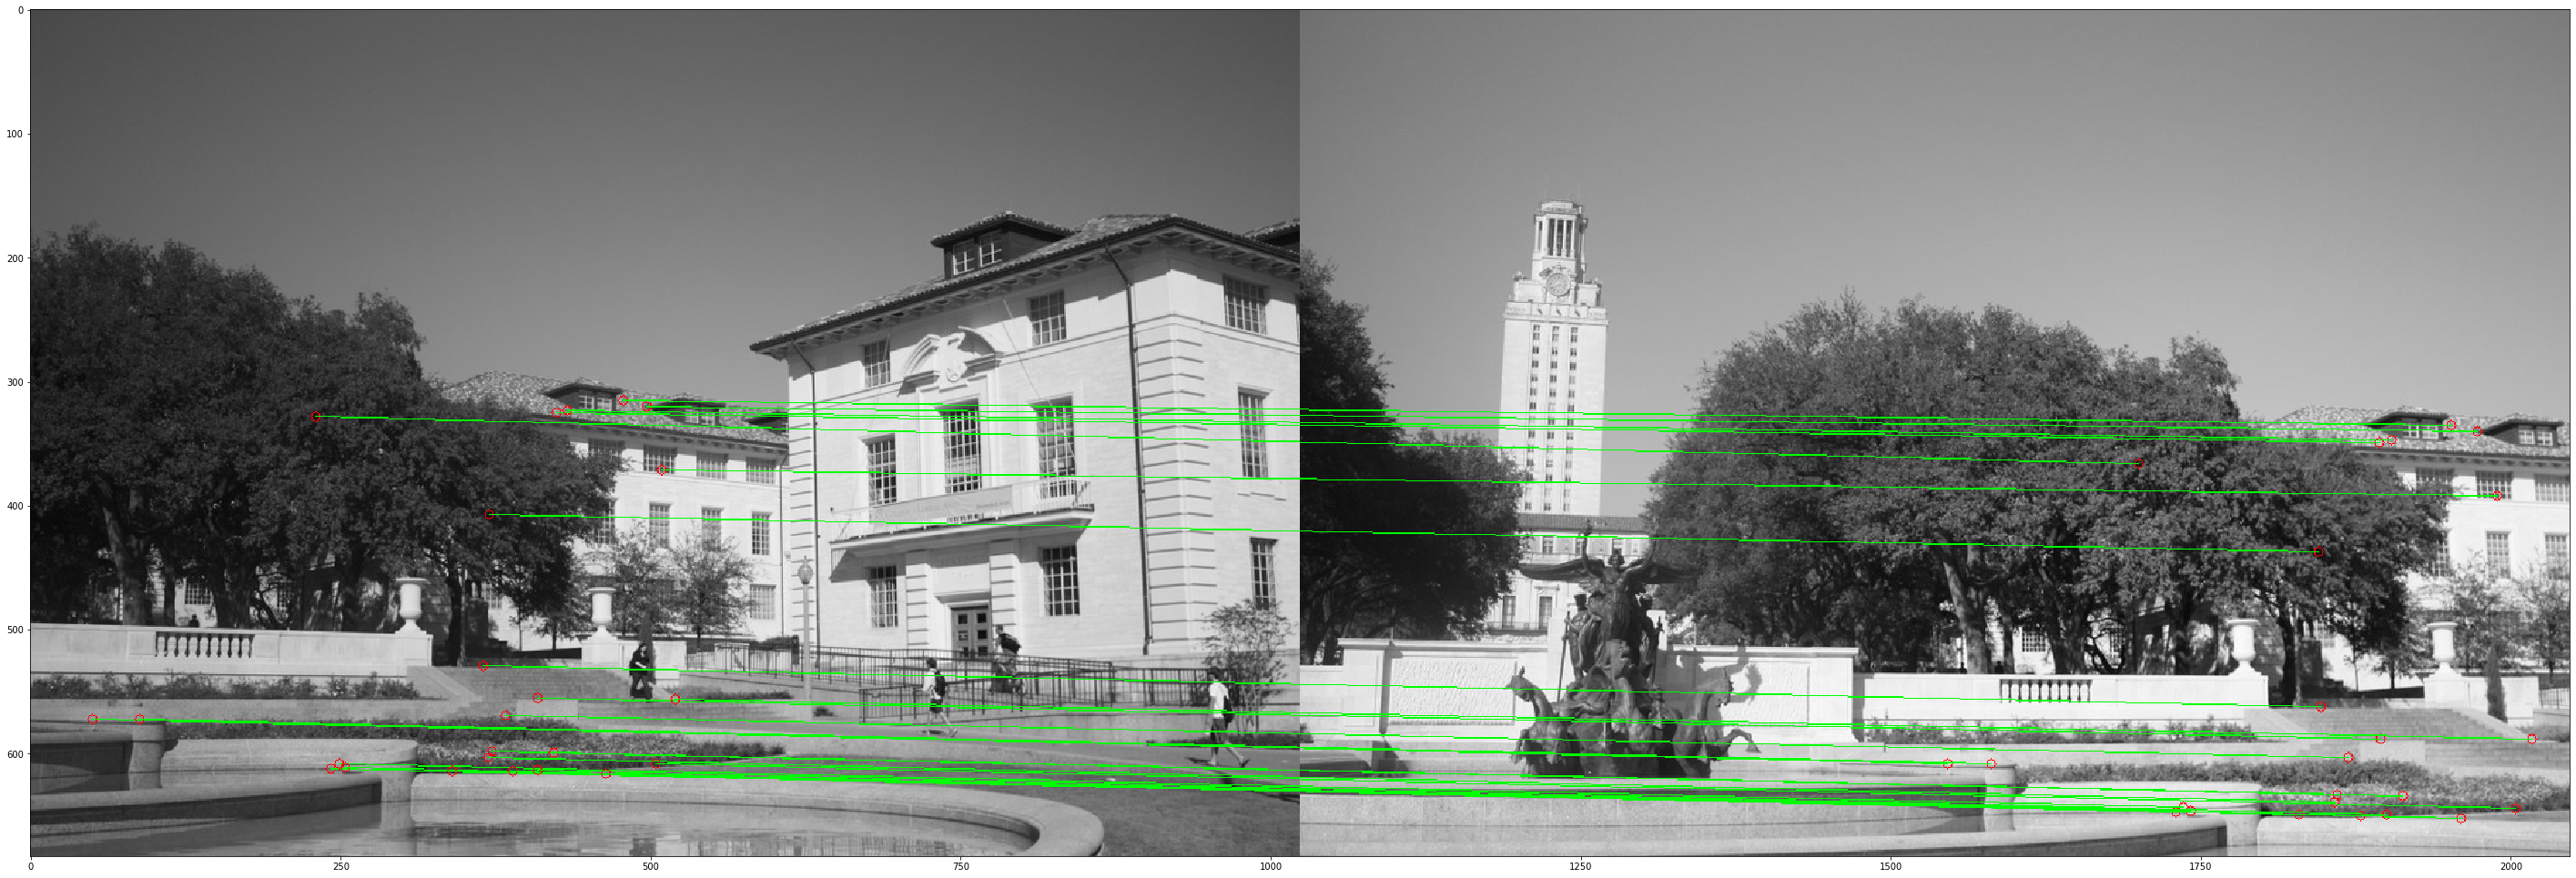

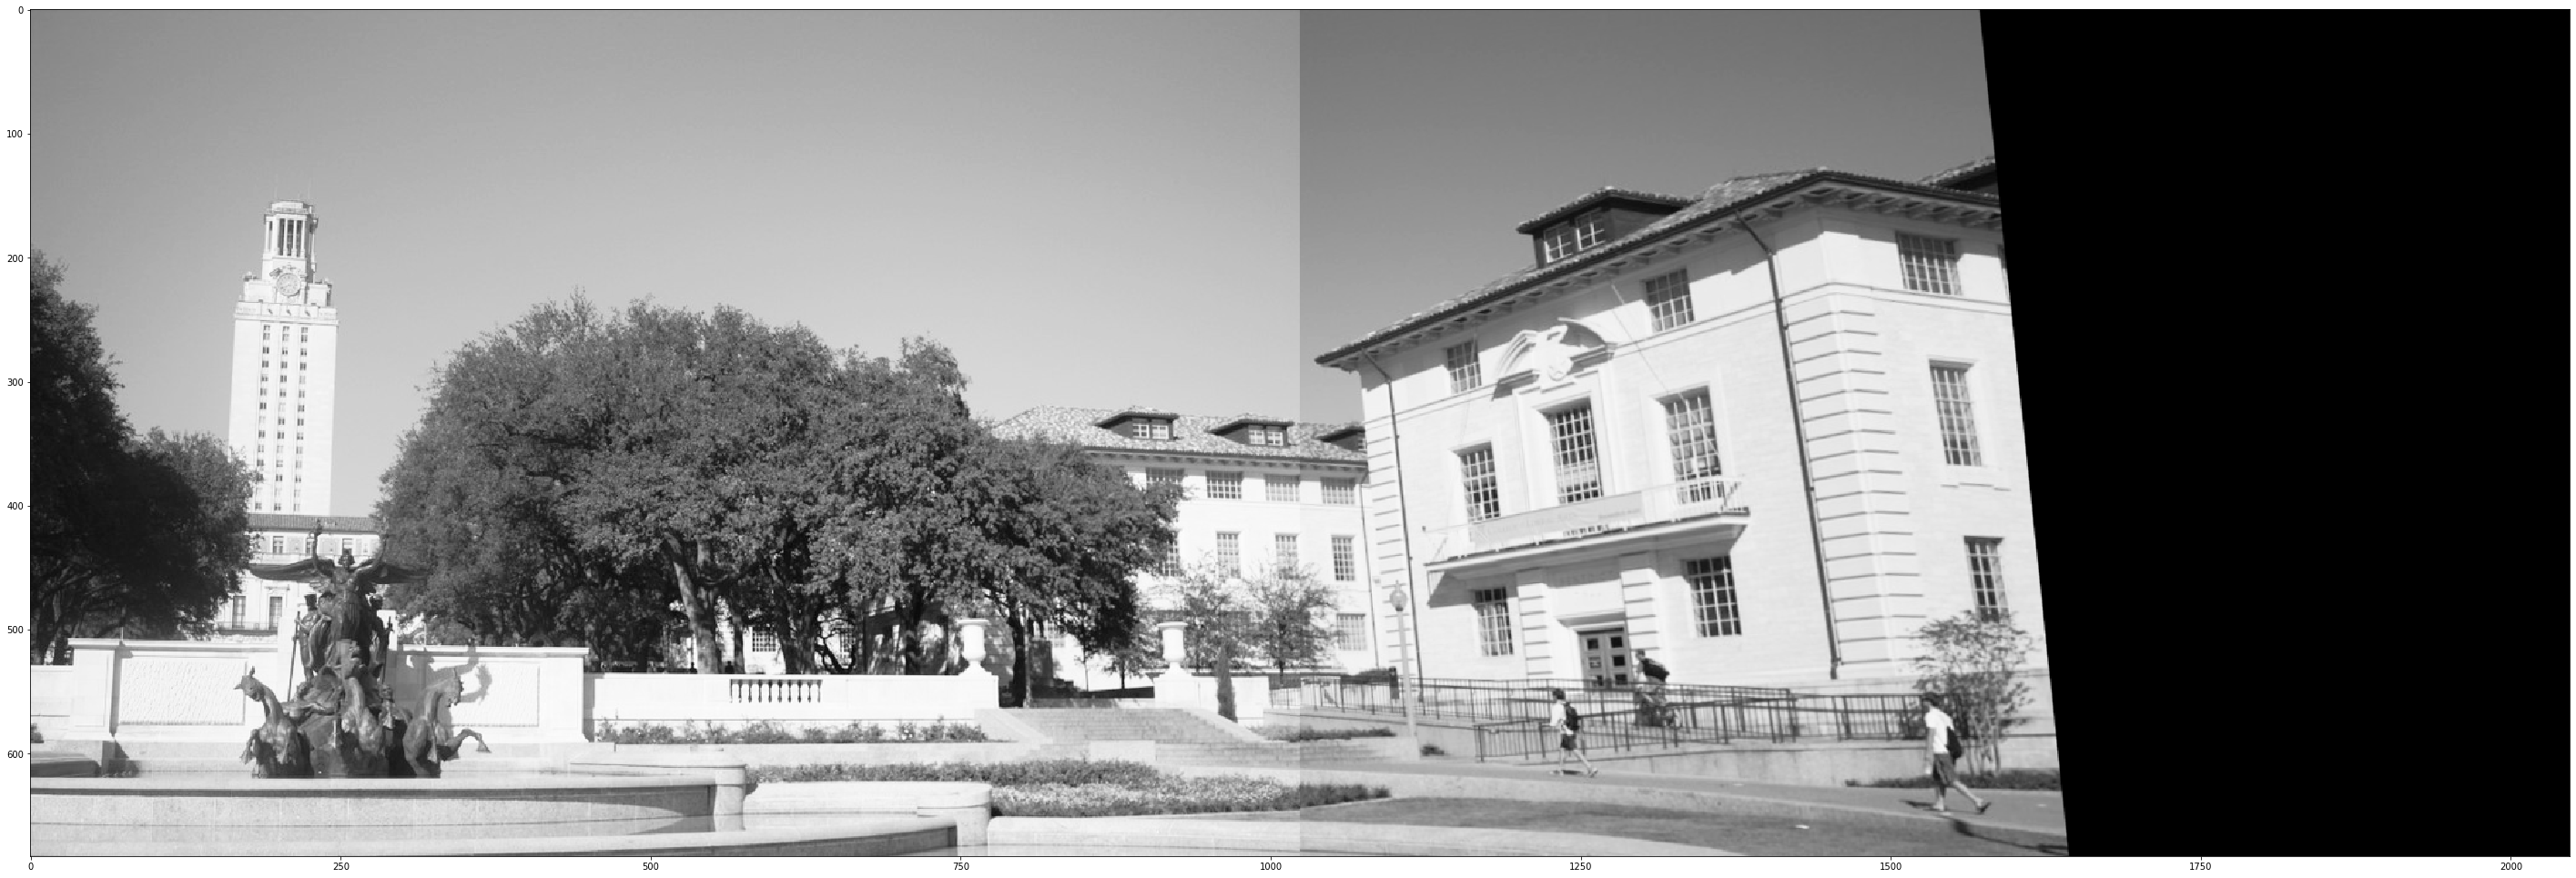

In [2]:
im1 = st.readImage("right1.jpg")
im2 = st.readImage("left1.jpg")

output = st.getfinalImage(im1, im2, H)

plt.figure(figsize=(50,50))
plt.imshow(matchImg, cmap = cm.Greys_r)

plt.figure(figsize=(50,50))
plt.imshow(output, cmap = cm.Greys_r)

SIFT consists of 4 steps

1) Scale-space Extrema Detection
Laplacian of Gasussian (LoG) is found for the image by varying σ values. LoG helps in detecting blobs. Gaussian kernel with low σ gives high value for small corner while gaussian kernel with high σ fits well for larger corner. Finding a local maxima across the scale and space give us a list of (x,y,σ) meaning that we have a keypoint at (x,y) at a scale of σ.

SIFT uses Difference of Gaussians(DoG) as LoG is costly. Blurring of an image with two different sigmas gives DoG. This process is done for different octaves of the image in Gaussian Pyramid. Once this DoG are found, images are searched for local extrema over scale and space which are potential keypoints.

2) Keypoint Localization

We refine the keypoints to get more accurate results using Taylor series expansion of scale space, if the intensity at this extrema is less than a threshold value, it is rejected. DoG has higher response for edges, so edges can also be removed. If this ratio is greater than a threshold that keypoint is discarded. So it eliminates any low-contrast keypoints and edge keypoints and what remains is strong interest points.

3) Orientation Assignment

Now an orientation is assigned to each keypoint to achieve invariance to image rotation. A neighbourhood is taken around the keypoint location depending on the scale, and the gradient magnitude and direction are calculated in that region.
An orientation histogram with 36 bins covering 360 degrees is created. The highest peak in the histogram is taken and any peak above 80% of it is also considered to calculate the orientation. It creates keypoints with same location and scale, but different directions.

4) Keypoint Descriptor

To create keypoint descriptor, A 16x16 neighbourhood around the keypoint is taken and divided into 16 sub-blocks of 4x4 size.
For each sub-block, 8 bin orientation histogram is created. So a total of 128 bin values are available. It is represented as a vector to form keypoint descriptor.

Source: https://docs.opencv.org/3.4/da/df5/tutorial_py_sift_intro.html